<a href="https://colab.research.google.com/github/dzerkes/ml-monitoring/blob/main/drift_detection_using_torchdrift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchdrift==0.1.0.post1
!pip install seaborn==0.12.2
!pip install pandas==1.4.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


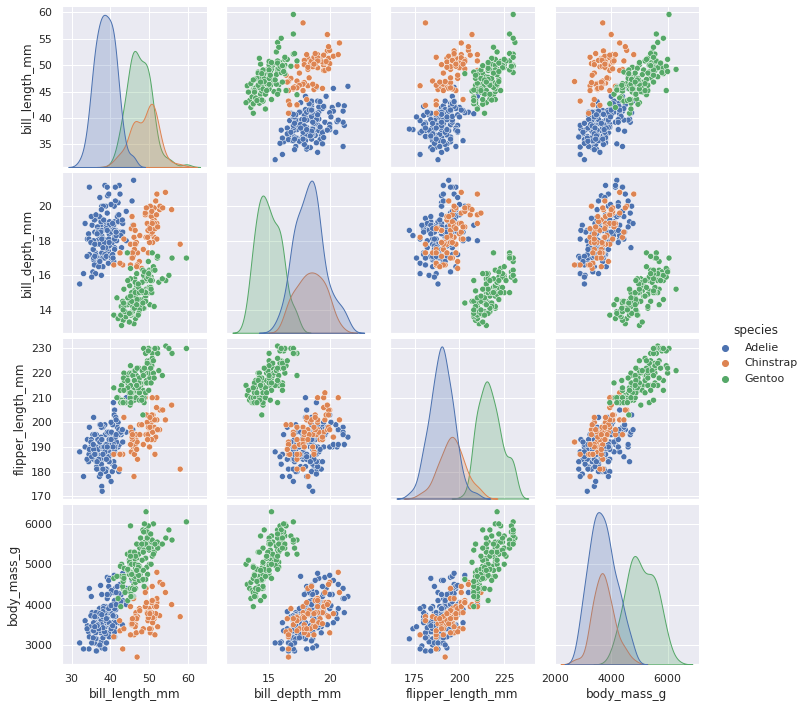

In [ ]:
sns.set()

sns.pairplot(penguins[["species",
                       "bill_length_mm",
                       "bill_depth_mm",
                       "flipper_length_mm",
                       "body_mass_g"]],
                       hue = "species",
                       size = 2.5)

In [ ]:
train_set = penguins["flipper_length_mm"][0:172].values
test_set = penguins["flipper_length_mm"][172:].values

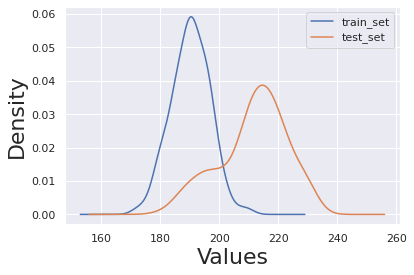

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def density_plot(train_set, test_set):
    """Generate a density plot for two 1-D numpy arrays"""
    dataset_tensor = pd.DataFrame({'train_set' : train_set,
                                   'test_set' : test_set}, 
                                   index=train_set)
    dataset_tensor.plot.kde()
    plt.xlabel("Values", fontsize=22)
    plt.ylabel("Density", fontsize=22)

density_plot(train_set,test_set)

In [ ]:
import torch
import torchdrift
from torchdrift.detectors.mmd import GaussianKernel

def numpy_to_tensor(trainset, testset):
    """ Convert numpy array to torch tensor"""
    train_tensor = torch.from_numpy(trainset)
    train_tensor = train_tensor.reshape(trainset.shape[0], 1)
    test_tensor = torch.from_numpy(testset)
    test_tensor = test_tensor.reshape(testset.shape[0], 1)
    return train_tensor, test_tensor

def plot_driftscore(drift_score, train_set, test_set):
    """ Plot drift scores obtained from driftdetector """
    fig = plt.figure(figsize = (25, 10))
    gs = fig.add_gridspec(3, hspace=0.5)
    axs = gs.subplots(sharex=False, sharey=False)
    axs[0].plot(train_set)
    axs[0].set_title("Train data")
    axs[1].plot(test_set)
    axs[1].set_title("Test data")
    axs[2].plot(drift_score, color='red',
                marker='o', linestyle='dashed',
                linewidth=2, markersize=12)
    axs[2].set_title("p-values")

def drift_detector(traintensor, testtensor, kernel):
    """ Use torchdrift to calculate p-value for a given test set"""
    drift_detector = torchdrift.detectors.KernelMMDDriftDetector(kernel=kernel)
    drift_detector.fit(x=traintensor)
    p_val = drift_detector.compute_p_value(testtensor)
    if p_val < 0.05:
        print(f"The test set p-value is: {p_val}. The distributions are different.")
    else:
        print(f"The test set p-value is: {p_val}. The distributions are not different.")
        
    return p_val

def calculate_drift(train_set, test_set, steps=1000,
                  kernel="GaussianKernel"):
    """ Calculate drift given a train and test datasets """       
    train_set_tensor, test_set_tensor = numpy_to_tensor(train_set, test_set)
    drift_score = []
    i = 0
    while i<len(test_set_tensor):
        test_data = test_set_tensor[i:i+steps]
        p_value = drift_detector(train_set_tensor, test_data, kernel)
        i = i + steps
        drift_score.append(p_value)
    
    plot_driftscore(drift_score, train_set, test_set)

The test set p-value is: 0.0. The distributions are different.


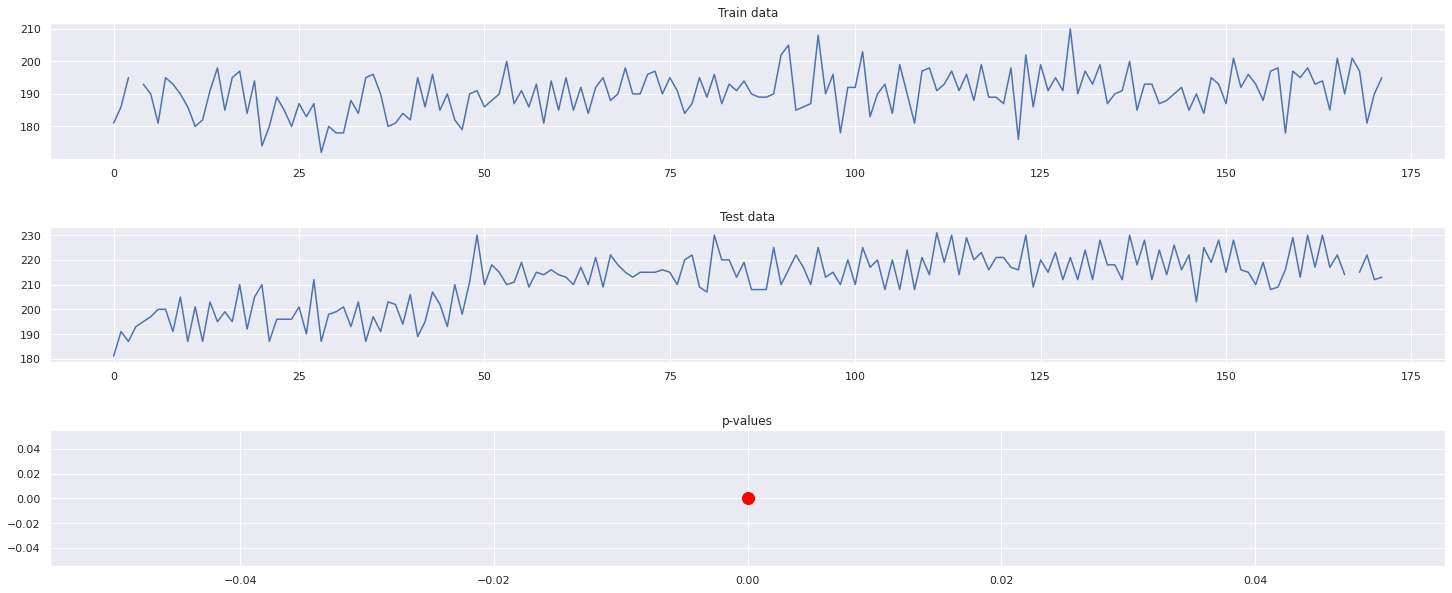

In [ ]:
kernel = GaussianKernel()
calculate_drift(train_set, 
              test_set, 
              steps=200,
              kernel= kernel)

The test set p-value is: 0.0. The distributions are different.
The test set p-value is: 0.0. The distributions are different.
The test set p-value is: 0.0. The distributions are different.
The test set p-value is: 0.0. The distributions are different.


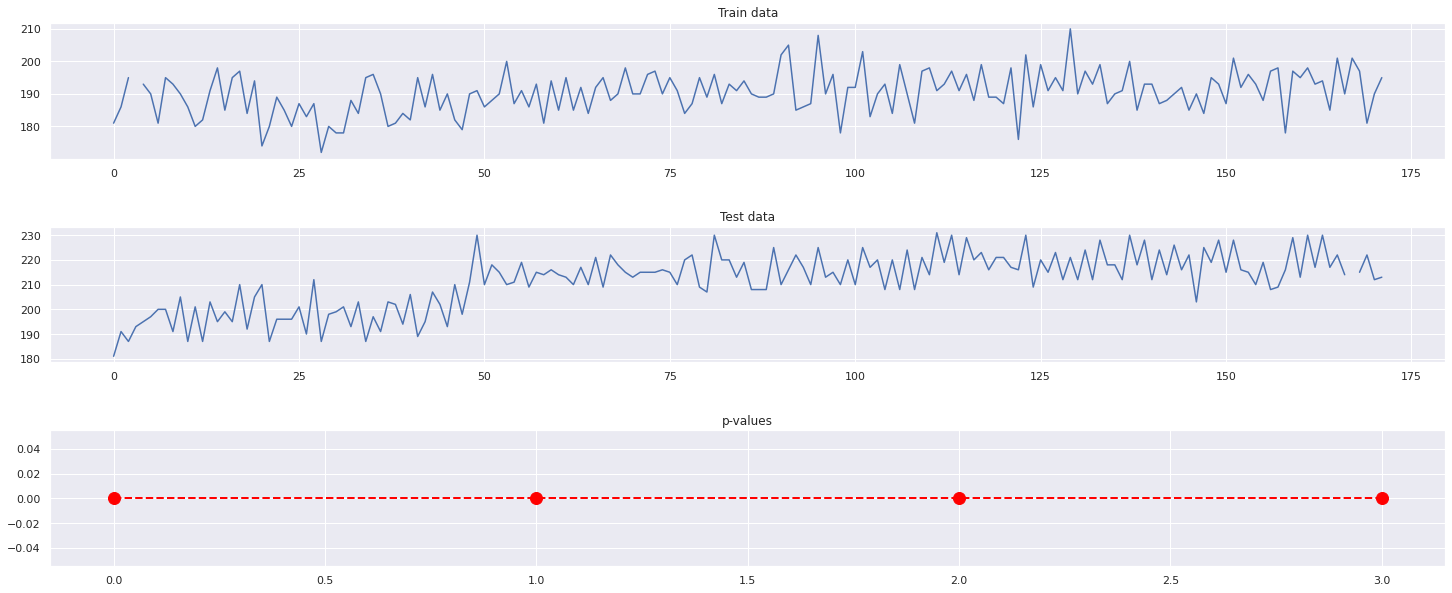

In [ ]:
kernel = GaussianKernel()
calculate_drift(train_set, 
              test_set, 
              steps=50,
              kernel= kernel)

<Axes: >

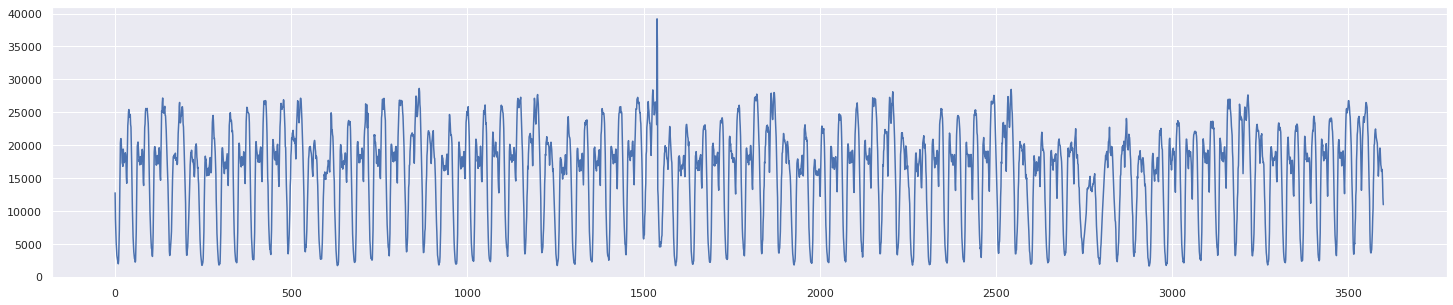

In [ ]:
import pandas as pd
import numpy as np

taxi_df = pd.read_csv("https://zenodo.org/record/4276428/files/STUMPY_Basics_Taxi.csv?download=1")
taxi_df['value'] = taxi_df['value'].astype(np.float64)
taxi_df.value.plot(figsize = (25, 5))


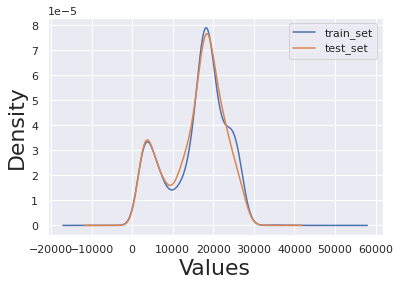

In [ ]:
train_set = taxi_df.value[0:1800].values
test_set = taxi_df.value[1800:].values
density_plot(train_set,test_set)

The test set p-value is: 0.5230000019073486. The distributions are not different.
The test set p-value is: 0.7260000109672546. The distributions are not different.
The test set p-value is: 0.18400000035762787. The distributions are not different.
The test set p-value is: 0.0. The distributions are different.
The test set p-value is: 0.38499999046325684. The distributions are not different.
The test set p-value is: 0.3019999861717224. The distributions are not different.


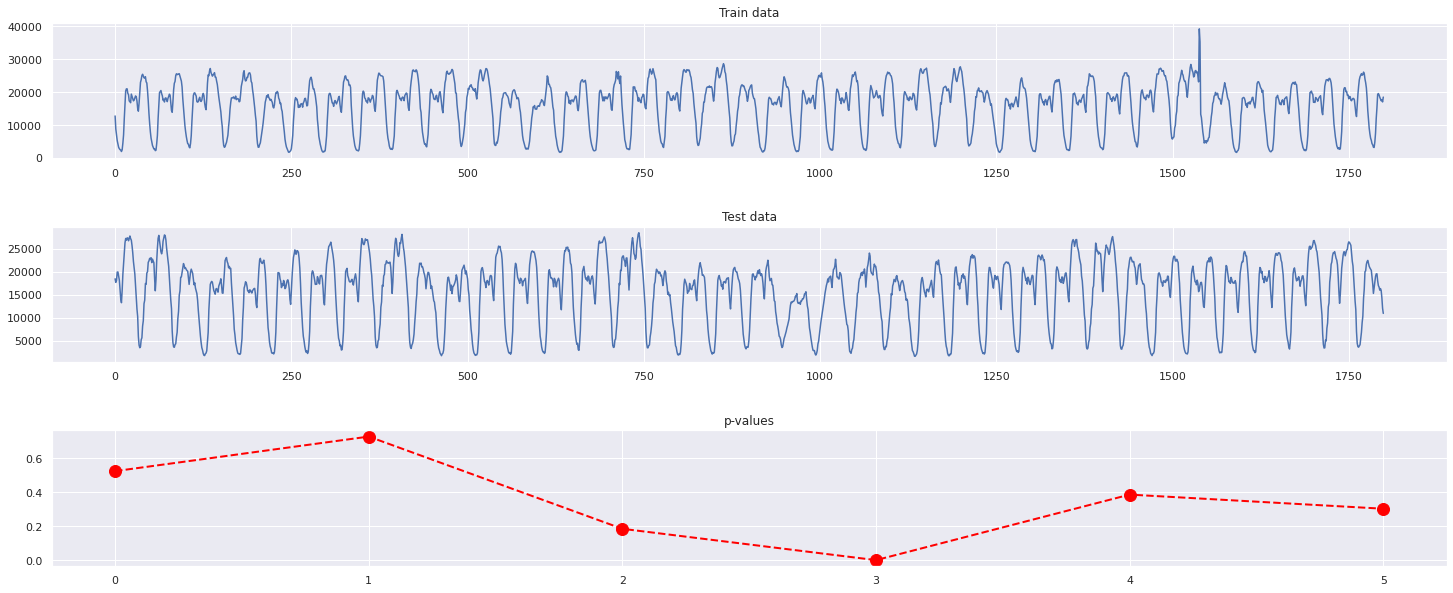

In [ ]:
kernel = GaussianKernel()
calculate_drift(train_set, 
              test_set, 
              steps=300,
              kernel= kernel)